In [8]:
# import required modules
from dataset import AngioDataset
import matplotlib.pyplot as plt
import torch
import numpy as np
import torch.nn as nn
from torch.utils.data import DataLoader
from unet import UNet
from run_training import run_training
from torch.utils.tensorboard import SummaryWriter
from metric import DiceCoefficient
from utils import load_checkpoint, load_h5
from test import test_repatch


In [2]:
print('Starting')

patch_size = [1,512,512]
final_activation = "Sigmoid"
batch_size = 1

model = UNet(depth=4, in_channels=1, out_channels=1, final_activation=final_activation)

# set loss function
loss_function = nn.BCELoss()

# set optimizer
lr = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# set metrics
dice = DiceCoefficient()
n_epochs = 5

modelnum = '015'

device = torch.device("cuda") if torch.cuda.is_available else torch.device("cpu")

print('Starting to load datasets')
train_dataset = AngioDataset('train',patch_size=patch_size)
val_dataset = AngioDataset('val',patch_size=patch_size)


# pass data to DataLoader
train_loader = DataLoader(train_dataset, batch_size= batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
print('Data loaded')

# pass to device

model = model.to(device)


# set logger's parameters
logger = SummaryWriter(f'runs/{modelnum}')
log_interval=1

# model's training


checkpoint_path = '/group/dl4miacourse/The_Segmenters/Checkpoints'
run_training(model, optimizer, dice, n_epochs,
             train_loader, val_loader, loss_function, log_interval, logger, device=device, 
             path = checkpoint_path,
             key = 'checkpoint' + modelnum)

Starting
Starting to load datasets
Data loaded
Train Epoch: 0 [0/84 (0%)]	Loss: 0.628821
Train Epoch: 0 [1/84 (1%)]	Loss: 0.507548
Train Epoch: 0 [2/84 (2%)]	Loss: 0.345466
Train Epoch: 0 [3/84 (4%)]	Loss: 0.194723
Train Epoch: 0 [4/84 (5%)]	Loss: 0.151329
Train Epoch: 0 [5/84 (6%)]	Loss: 0.254627
Train Epoch: 0 [6/84 (7%)]	Loss: 0.220821
Train Epoch: 0 [7/84 (8%)]	Loss: 0.226580
Train Epoch: 0 [8/84 (10%)]	Loss: 0.179619
Train Epoch: 0 [9/84 (11%)]	Loss: 0.164742
Train Epoch: 0 [10/84 (12%)]	Loss: 0.138620
Train Epoch: 0 [11/84 (13%)]	Loss: 0.138436
Train Epoch: 0 [12/84 (14%)]	Loss: 0.148017
Train Epoch: 0 [13/84 (15%)]	Loss: 0.161056
Train Epoch: 0 [14/84 (17%)]	Loss: 0.137083
Train Epoch: 0 [15/84 (18%)]	Loss: 0.144855
Train Epoch: 0 [16/84 (19%)]	Loss: 0.128651
Train Epoch: 0 [17/84 (20%)]	Loss: 0.126555
Train Epoch: 0 [18/84 (21%)]	Loss: 0.116384
Train Epoch: 0 [19/84 (23%)]	Loss: 0.126283
Train Epoch: 0 [20/84 (24%)]	Loss: 0.123094
Train Epoch: 0 [21/84 (25%)]	Loss: 0.101188
Tra

In [3]:
final_activation = "Sigmoid"
patch_dim = 512
patch_size = [1,patch_dim,patch_dim]
checkpoint_key = '015'
checkpoint_path = '/group/dl4miacourse/The_Segmenters/Checkpoints'
save_path = '/group/dl4miacourse/The_Segmenters/Predictions/' + checkpoint_key


model_loaded_init = UNet(depth=4, in_channels=1, out_channels=1, final_activation=final_activation)
model_loaded = load_checkpoint(model_loaded_init, checkpoint_path, optimizer=None, key='checkpoint' + checkpoint_key)

test_dataset = AngioDataset('test',patch_size=patch_size)
test_loader = DataLoader(test_dataset, batch_size=1)
vol = test_repatch(model_loaded, test_loader, saving_path = save_path)

Done writing to h5


In [4]:
vol.shape

(12, 512, 512)

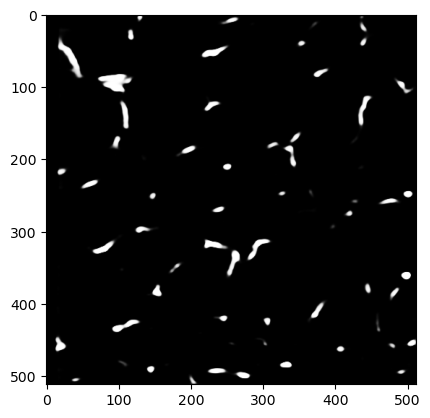

In [5]:
plt.imshow(vol[0], cmap='gray')
plt.show()

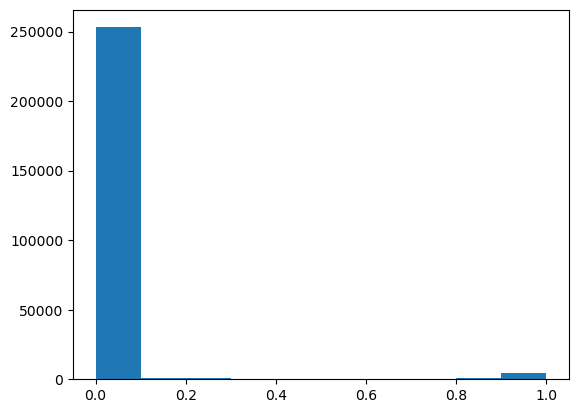

In [6]:
plt.hist(vol[0].ravel())
plt.show()

In [13]:
vol_loaded = load_h5(save_path+'.h5', 'predictions')

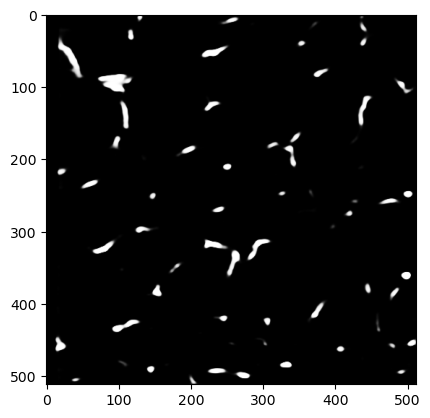

In [14]:
plt.imshow(vol_loaded[0], cmap='gray')
plt.show()